#Quora Insincere Questions Classification

Predicting whether a question asked on Quora is sincere or not

Dataset & deets: https://www.kaggle.com/competitions/quora-insincere-questions-classification/data

Outline:



*   Download and explore the data
*   Apply text preprocessing techniques
*   Implement BoW for text vectorization
*   Train ML Models for text classification
*   Make predictions on the test data and submit to kaggle



## Download and Explore the Data


Outline:

1.   Dataset from Kaggle to colab
2.   Explore the data using Pandas
3.   Create a small working sample





### Dataset from Kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

 84% 46.0M/54.9M [00:00<00:00, 86.6MB/s]
100% 54.9M/54.9M [00:00<00:00, 91.2MB/s]


In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

 57% 9.00M/15.8M [00:00<00:00, 29.5MB/s]
100% 15.8M/15.8M [00:00<00:00, 49.3MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 107MB/s]


### Explore the data using Pandas

In [ ]:
train_data_path='/content/data/train.csv.zip'
test_data_path='/content/data/test.csv.zip'
sample_data_path='/content/data/sample_submission.csv.zip'

In [ ]:
import pandas as pd

In [ ]:
raw_df=pd.read_csv(train_data_path)

In [ ]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


target - a question labeled "insincere" has a value of 1, otherwise 0

In [ ]:
raw_df.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

<Axes: >

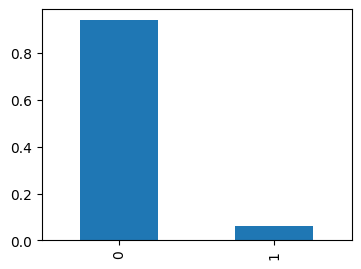

In [ ]:
raw_df.target.value_counts(normalize=True).plot(kind='bar',figsize=(4,3))

In [ ]:
print("Ratio of insicere to sincere questions:\n",raw_df.target.value_counts()[1]/raw_df.target.value_counts()[0])

Ratio of insicere to sincere questions:
 0.06595054973753624


The dataset is skewed, instances of insincere questions is very less compared to the other class.
around 94% sincere quetions and 6% insincere

Classification metrics will need to be selected/observed

F1 Score--> mentioned in the description of the competition

Separating the sincere and insincere questions dataset

In [ ]:
sincere_df=raw_df[raw_df['target']==0]
sincere_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [ ]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [ ]:
insincere_df=raw_df[raw_df['target']==1]

In [ ]:
insincere_df.question_text.values[10:20]

array(['Would Europeans continue to participate in the Arab war for the destruction of Israel and killing all the Jews, if they knew that god himself defends Israel and he will do to Europeans what the Arabs want to do to the Jews?',
       'Why are Americans, British, Canadians, Australians and New Zealanders considered to be separate nations even when they all speak the same language?',
       'If both Honey Singh and Justin Bieber fall from the 5th floor, who will survive?',
       'Why are liberal minorities so voilent towards poeple with diffrent poltical beleifs? Should supporting trump be a sentence to be imprisoned or savegely attacked?',
       "Can we all now admit that President Trump doesn't really want Congress to pass legislation replacing DACA to protect dreamers?",
       'The American economy is growing under Trump’s presidency, why do people still hate Trump as a president?',
       "Why don't poor countries print more money to use for paying for education, etc.?",
  

In [ ]:
test_df=pd.read_csv(test_data_path)

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
subm_df=pd.read_csv(sample_data_path)

In [ ]:
subm_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
subm_df.prediction.value_counts()

0    375806
Name: prediction, dtype: int64

### Create a working sample

In [ ]:
sample_size=100_000

In [ ]:
sample_df=raw_df.sample(sample_size,random_state=10)

In [ ]:
sample_df

,qid,question_text,target
1207681,ecb4271f52512e26ec9b,Why do savants usually have either mental or p...,0
123360,1824f7f4c8363a0d86b2,Is judge David r. Cashman ever been investigated?,0
376537,49d07f0e82e94e8b90f9,What do religious people think about people wh...,0
858180,a823b3f06464ba262910,What is pwoli?,0
570041,6fb1c8717219efe3caa5,"Assuming you don't own a lot of land, is it re...",0
...,...,...,...
784188,99a04d84f3bcdd520057,Can I get admission in best IITs (in best fiel...,0
643652,7e0fcd6271a7bbbea838,What are some Illuminati members in Nigeria?,0
1296244,fe0dba5b9a6d344e855c,How can you stop thinking about a certain thin...,0
680076,85306610c166852e6381,What is the nature of the Sanhedrin?,0


So, instead of working with 13 lac rows in raw_df we are now working with a sample 1lac rows in the sample_df

## Apply text preprocessing techniques

Outline:


1.   Tokenization
2.   Stop words removal
3.   Stemming




In [ ]:
# tokenization
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
q0= sincere_df.question_text.values[0]
q0

'How did Quebec nationalists see their province as a nation in the 1960s?'

In [ ]:
q0=q0.lower()

In [ ]:
q0_tokenized=word_tokenize(q0)
q0_tokenized

['how',
 'did',
 'quebec',
 'nationalists',
 'see',
 'their',
 'province',
 'as',
 'a',
 'nation',
 'in',
 'the',
 '1960s',
 '?']

In [ ]:
# Stopwords
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stopwords=stopwords.words('english')

In [ ]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
def remove_stopwords(tokens):
  return [word for word in tokens if word not in english_stopwords]

In [ ]:
q0_stp=remove_stopwords(q0_tokenized)
q0_stp

['quebec', 'nationalists', 'see', 'province', 'nation', '1960s', '?']

How does Bag of Words work?

1. Create a vocabulary of all unique words in the corpus and assign them an index

2. Convert each document into vectors by writing the count of words in the sentence at the right index

## Implement Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
stemmer=PorterStemmer()

In [ ]:
def tokenize(text):
  return [stemmer.stem(word) for word in word_tokenize(text)]

In [ ]:
vectorizer= CountVectorizer(lowercase=True,
                            stop_words=english_stopwords,
                            tokenizer=tokenize,
                            max_features=1000)

In [ ]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 39.5 s, sys: 104 ms, total: 39.6 s
Wall time: 40 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7c3a62931ea0>)

In [ ]:
len(vectorizer.vocabulary_)

1000

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'re", "'s", "'ve", '(', ')',
       ',', '-', '.', '1', '10', '100', '12', '12th', '15', '2', '20',
       '2017', '2018', '3', '30', '4', '5', '50', '6', '7', '8', ':', '?',
       '[', ']', '``', 'abl', 'abroad', 'abus', 'accept', 'access',
       'accomplish', 'account', 'achiev', 'act', 'action', 'activ',
       'actor', 'actual', 'ad', 'add', 'address', 'admiss', 'adult',
       'advanc', 'advantag', 'advic', 'affect', 'african', 'age', 'ago',
       'air', 'allow', 'alreadi', 'also', 'alway', 'amazon', 'america',
       'american', 'among', 'amount', 'analysi', 'ancient', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack'], dtype=object)

In [ ]:
%%time
input=vectorizer.transform(sample_df.question_text)

CPU times: user 39.4 s, sys: 69.9 ms, total: 39.4 s
Wall time: 40 s


In [ ]:
input.shape

(100000, 1000)

In [ ]:
input[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
sample_df.question_text.values[0]

'Why do savants usually have either mental or physical problems?'

In [ ]:
%%time
test_input=vectorizer.transform(test_df.question_text)

CPU times: user 2min 27s, sys: 347 ms, total: 2min 28s
Wall time: 2min 29s


## Train ML models for text classification

* create a training & validation set
* Logistic regression for classification
* Make predictions on training, validation and test data

### Training and Validation data

Train test split

In [ ]:
sample_df

,qid,question_text,target
1207681,ecb4271f52512e26ec9b,Why do savants usually have either mental or p...,0
123360,1824f7f4c8363a0d86b2,Is judge David r. Cashman ever been investigated?,0
376537,49d07f0e82e94e8b90f9,What do religious people think about people wh...,0
858180,a823b3f06464ba262910,What is pwoli?,0
570041,6fb1c8717219efe3caa5,"Assuming you don't own a lot of land, is it re...",0
...,...,...,...
784188,99a04d84f3bcdd520057,Can I get admission in best IITs (in best fiel...,0
643652,7e0fcd6271a7bbbea838,What are some Illuminati members in Nigeria?,0
1296244,fe0dba5b9a6d344e855c,How can you stop thinking about a certain thin...,0
680076,85306610c166852e6381,What is the nature of the Sanhedrin?,0


In [ ]:
input.shape

(100000, 1000)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_in,test_in,y_train,y_test = train_test_split(input,sample_df.target,test_size=0.3)

In [ ]:
train_in.shape

(70000, 1000)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000,solver='sag')

In [ ]:
lr.fit(train_in,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')